# Exercises for Lecture 17 (Ensemble Learning and Random Forests)

In [1]:
#using inbuilt function 
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import train_test_split

# training set: a noisy quadratic function
rnd.seed(42)
X = rnd.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * rnd.randn(100)

#first create test and train data
X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor( max_depth = 2, n_estimators = 3, learning_rate = 1.0) 
gbrt.fit(X_train, y_train)
y_pred_gbrt = gbrt.predict(X)

In [2]:
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

# train GRBR regressor with 120 trees
gbrt = GradientBoostingRegressor(
    max_depth=2, 
    n_estimators=120, 
    learning_rate=0.1, #set a low learning rate here
    random_state=42)

gbrt.fit(X_train, y_train)

# measure MSE validation error at each stage
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]

## Exercise 1

- Train a new GBRT using the optimal solution from the above. 
- Plot the validation error as a function of the number of trees 
- Plot the best model 


In [3]:
# train another GBRT ensemble using optimal #trees
best_n_estimators = np.argmin(errors)
min_error = errors[best_n_estimators]

gbrt_best = GradientBoostingRegressor(
    max_depth=2, 
    n_estimators=best_n_estimators, 
    learning_rate=0.1, 
    random_state=42)

gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=40, random_state=42)

In [4]:
def plot_predictions(
    regressors, X, y, axes, 
    label=None, 
    style="r-", 
    data_style="b.", 
    data_label=None):
    
    x1 = np.linspace(axes[0], axes[1], 500)
    
    y_pred = sum(
        regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
            
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

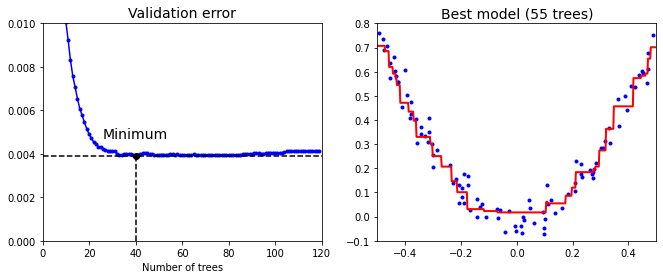

In [5]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([best_n_estimators, best_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(best_n_estimators, min_error, "ko")
plt.text(best_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (55 trees)", fontsize=14)

#save_fig("early_stopping_gbrt_plot")
plt.show()